In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\Utilisateur\PycharmProjects\artefactGameRecommendation\project\input\games_dataset_clean.csv')

In [3]:
df.head(50)

,name,platform,release_year,summary,developer,genre(s),multiplayer,rating,score,opinion
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998,"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,Action Adventure,No Multiplayer,E,95.0,92.164545
1,Tony Hawk's Pro Skater 2,PlayStation,2000,As most major publishers' development efforts ...,Neversoft Entertainment,Sports,Multiplayer,T,86.0,81.333333
2,Grand Theft Auto IV,PlayStation 3,2008,[Metacritic's 2008 PS3 Game of the Year; Also ...,Rockstar North,Action Adventure,No Multiplayer,M,87.5,65.957447
3,SoulCalibur,Dreamcast,1999,"This is a tale of souls and swords, transcendi...",Namco,Action,Multiplayer,T,91.0,95.744681
4,Grand Theft Auto IV,Xbox 360,2008,[Metacritic's 2008 Xbox 360 Game of the Year; ...,Rockstar North,Action Adventure,No Multiplayer,M,88.5,71.556886
5,Super Mario Galaxy,Wii,2007,[Metacritic's 2007 Wii Game of the Year] The u...,Nintendo,Action,No Multiplayer,E,94.0,90.331126
6,Super Mario Galaxy 2,Wii,2010,"Super Mario Galaxy 2, the sequel to the galaxy...",Nintendo EAD Tokyo,Action,No Multiplayer,E,94.0,92.270531
7,Red Dead Redemption 2,Xbox One,2018,Developed by the creators of Grand Theft Auto ...,Rockstar Games,Action Adventure,Multiplayer,M,88.5,74.067797
8,Grand Theft Auto V,Xbox One,2014,Grand Theft Auto 5 melds storytelling and game...,Rockstar North,Action Adventure,Multiplayer,M,88.0,80.606061
9,Grand Theft Auto V,PlayStation 3,2013,"Los Santos is a vast, sun-soaked metropolis fu...",Rockstar North,Modern,Multiplayer,M,90.0,79.204108


In [4]:
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
df_nlp = df.copy()

df_nlp.head()

,name,platform,release_year,summary,developer,genre(s),multiplayer,rating,score,opinion
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998,"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,Action Adventure,No Multiplayer,E,95.0,92.164545
1,Tony Hawk's Pro Skater 2,PlayStation,2000,As most major publishers' development efforts ...,Neversoft Entertainment,Sports,Multiplayer,T,86.0,81.333333
2,Grand Theft Auto IV,PlayStation 3,2008,[Metacritic's 2008 PS3 Game of the Year; Also ...,Rockstar North,Action Adventure,No Multiplayer,M,87.5,65.957447
3,SoulCalibur,Dreamcast,1999,"This is a tale of souls and swords, transcendi...",Namco,Action,Multiplayer,T,91.0,95.744681
4,Grand Theft Auto IV,Xbox 360,2008,[Metacritic's 2008 Xbox 360 Game of the Year; ...,Rockstar North,Action Adventure,No Multiplayer,M,88.5,71.556886


In [6]:
df_nlp['Key_words'] = ''
df_nlp['summary'].fillna('', inplace=True)

r = Rake()

for index, row in df_nlp.iterrows():
    r.extract_keywords_from_text(row['summary'])
    key_words_dict_scores = r.get_word_degrees()
    df_nlp.at[index, 'Key_words'] = list(key_words_dict_scores.keys())

In [7]:
df_nlp.head()

,name,platform,release_year,summary,developer,genre(s),multiplayer,rating,score,opinion,Key_words
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998,"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,Action Adventure,No Multiplayer,E,95.0,92.164545,"[young, boy, link, tricked, ganondorf, king, g..."
1,Tony Hawk's Pro Skater 2,PlayStation,2000,As most major publishers' development efforts ...,Neversoft Entertainment,Sports,Multiplayer,T,86.0,81.333333,"[major, publishers, development, efforts, shif..."
2,Grand Theft Auto IV,PlayStation 3,2008,[Metacritic's 2008 PS3 Game of the Year; Also ...,Rockstar North,Action Adventure,No Multiplayer,M,87.5,65.957447,"[metacritic, 2008, ps3, game, year, also, know..."
3,SoulCalibur,Dreamcast,1999,"This is a tale of souls and swords, transcendi...",Namco,Action,Multiplayer,T,91.0,95.744681,"[tale, souls, swords, transcending, world, his..."
4,Grand Theft Auto IV,Xbox 360,2008,[Metacritic's 2008 Xbox 360 Game of the Year; ...,Rockstar North,Action Adventure,No Multiplayer,M,88.5,71.556886,"[metacritic, 2008, xbox, 360, game, year, also..."


In [8]:
df_nlp['platform_lower'] = df_nlp['platform'].str.lower().str.replace(' ', '')
df_nlp['developer'] = df_nlp['developer'].str.lower().str.replace(' ', '')
df_nlp['genre(s)'] = df_nlp['genre(s)'].str.lower().str.replace(' ', '')
df_nlp['multiplayer'] = df_nlp['multiplayer'].str.lower().str.replace(' ', '')

In [9]:
df_nlp.head()

,name,platform,release_year,summary,developer,genre(s),multiplayer,rating,score,opinion,Key_words,platform_lower
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998,"As a young boy, Link is tricked by Ganondorf, ...",nintendo,actionadventure,nomultiplayer,E,95.0,92.164545,"[young, boy, link, tricked, ganondorf, king, g...",nintendo64
1,Tony Hawk's Pro Skater 2,PlayStation,2000,As most major publishers' development efforts ...,neversoftentertainment,sports,multiplayer,T,86.0,81.333333,"[major, publishers, development, efforts, shif...",playstation
2,Grand Theft Auto IV,PlayStation 3,2008,[Metacritic's 2008 PS3 Game of the Year; Also ...,rockstarnorth,actionadventure,nomultiplayer,M,87.5,65.957447,"[metacritic, 2008, ps3, game, year, also, know...",playstation3
3,SoulCalibur,Dreamcast,1999,"This is a tale of souls and swords, transcendi...",namco,action,multiplayer,T,91.0,95.744681,"[tale, souls, swords, transcending, world, his...",dreamcast
4,Grand Theft Auto IV,Xbox 360,2008,[Metacritic's 2008 Xbox 360 Game of the Year; ...,rockstarnorth,actionadventure,nomultiplayer,M,88.5,71.556886,"[metacritic, 2008, xbox, 360, game, year, also...",xbox360


In [10]:
df_nlp["release_year"] = df_nlp["release_year"].astype(str)

In [11]:
def update_key_words(x):
    key_words = x['Key_words']
    platform = x['platform_lower']
    year = x['release_year']
    developer = x['developer']
    genre = x['genre(s)']
    #multiplayer = x['multiplayer']

    key_words.append(platform)
    key_words.append(year)
    key_words.append(developer)
    key_words.append(genre)
    #key_words.append(multiplayer)

    return key_words

In [12]:
df_nlp['Key_words'] = df_nlp.apply(update_key_words, axis=1)

In [13]:
def join_list_to_string(lst):
    return ' '.join(lst)

df_nlp['Bag_of_words'] = df_nlp['Key_words'].apply(join_list_to_string)

In [14]:
df_nlp = df_nlp[['name','platform', 'Bag_of_words']]

In [15]:
df_nlp.head(50)

,name,platform,Bag_of_words
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,young boy link tricked ganondorf king gerudo t...
1,Tony Hawk's Pro Skater 2,PlayStation,major publishers development efforts shift num...
2,Grand Theft Auto IV,PlayStation 3,metacritic 2008 ps3 game year also known gta i...
3,SoulCalibur,Dreamcast,tale souls swords transcending world history t...
4,Grand Theft Auto IV,Xbox 360,metacritic 2008 xbox 360 game year also known ...
5,Super Mario Galaxy,Wii,metacritic 2007 wii game year ultimate nintend...
6,Super Mario Galaxy 2,Wii,super mario galaxy 2 sequel hopping original g...
7,Red Dead Redemption 2,Xbox One,developed creators grand theft auto v red dead...
8,Grand Theft Auto V,Xbox One,grand theft auto 5 melds storytelling gameplay...
9,Grand Theft Auto V,PlayStation 3,los santos vast sun soaked metropolis full sel...


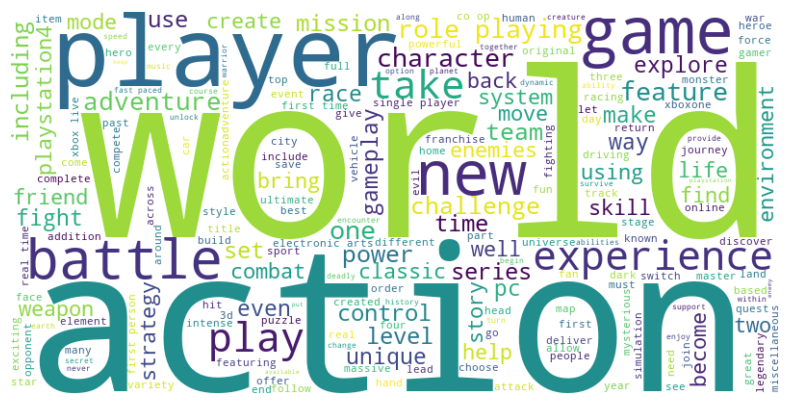

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = ' '.join(df_nlp['Bag_of_words'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
count = CountVectorizer()

In [18]:
count_matrix = count.fit_transform(df_nlp['Bag_of_words'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

[[1.         0.         0.04052204 ... 0.         0.03217447 0.04454354]
 [0.         1.         0.02575131 ... 0.         0.04089304 0.        ]
 [0.04052204 0.02575131 1.         ... 0.         0.         0.02526993]
 ...
 [0.         0.         0.         ... 1.         0.09124486 0.02807173]
 [0.03217447 0.04089304 0.         ... 0.09124486 1.         0.        ]
 [0.04454354 0.         0.02526993 ... 0.02807173 0.         1.        ]]


In [19]:
indices = pd.Series(df_nlp['name'])

In [20]:
def recommend(title, cosine_sim = cosine_sim):
    recommended_games = []
    idx = indices[indices == title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)

    for i in top_10_indices:
        game_name = list(df_nlp['name'])[i]
        game_platform = list(df_nlp['platform'])[i]
        recommended_games.append(f"{game_name} ({game_platform})")

    return recommended_games

In [21]:
recommend('Half-Life 2')

['Half-Life 2 (Xbox)',
 'The Orange Box (PC)',
 'The Orange Box (Xbox 360)',
 'The Orange Box (PlayStation 3)',
 'Black Mesa (PC)',
 'Half-Life (PC)',
 'Half-Life 2: Episode One (PC)',
 'Half-Life (PlayStation 2)',
 'Cornerstone: The Song of Tyrim (PC)',
 'Luckslinger (PC)']

In [22]:
df_nlp.to_csv(r'C:\Users\Utilisateur\PycharmProjects\artefactGameRecommendation\project\app\bag_of_words.csv', index=False)

#